# HW 6 Statistics and probability homework

Complete homework notebook in a homework directory with your name and zip up the homework directory and submit it to our class blackboard/elearn site.
Complete all the parts 6.1 to 6.5 for score of 3.  

Investigate plotting, linearegression, or complex matrix manipulation to get a score of 4 or cover two additional investigations for a score of 5. 

## 6.1 Coin flipping 


## 6.1.1
Write a function, flip_sum,  which generates $n$ random coin flips from a fair coin and then returns the number of heads. 

A fair coin is defined to be a coin where $P($heads$)=\frac{1}{2}$

The output type should be a numpy integer, hint: use random.rand()


In [167]:
import random 

# The function "flip_sum" below return the number of head divided by the number of coin toss
# The input variable "number_toss" is number of times we toss a coin
def flip_sum(number_toss):

    # "heads" is our number of heads. 
    # Initially it is equal to 0
    heads = 0

    
    for i in range(0, number_toss):
               
        flip = int(random.random()*2)
        

        if (flip == 0):
            # "flip" = 0, so it's a head !
            # We have to increment the number of "heads" by 1:
            heads=heads + 1 

    return heads



## 6.1.2 Test it 
Check it by showing the results of 100 coins being flipped

In [168]:
my_number_toss = 100
my_head = flip_sum(my_number_toss)
print ("Total number of heads {}".format(my_head))

Total number of heads 49


## 6.1.3 Create and display a histogram of 200 experiments of flipping 5 coins.

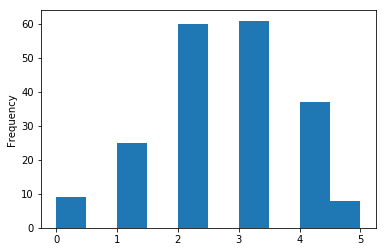

In [170]:
data=[flip_sum(5) for i in range(200)]
Showdata=pd.Series(data)
Showdata.plot.hist()

## 6.1.4
Write a function, estimate_prob, that uses flip_sum to estimate the following probability:

$P(  k_1 <= $ number of heads in $n$ flips $< k_2 ) $

The function should estimate the probability by running $m$ different trials of flip_sum(n), probably using a for loop.

In order to receive full credit estimate_prob call flip_sum (aka: flip_sum is located inside the estimate_prob function)

In [187]:
def estimate_prob(n,k1,k2,m):
    """Estimate the probability that n flips of a fair coin result in k1 to k2 heads
         n: the number of coin flips (length of the sequence)
         k1,k2: the trial is successful if the number of heads is 
                between k1 and k2-1
         m: the number of trials (number of sequences of length n)
         
         output: the estimated probability 
         """
    success=0.0
    for i in range(m):
        heads= flip_sum(n)
        #print(heads)
        if heads>=k1 and heads<k2:
            success+=1
    
    return success/m

In [188]:
# this is a small sanity check


x = estimate_prob(100,45,55,1000)
print x
#assert 'float' in str(type(x))
#print "does x==0.687?"

0.68


## 6.2.2  Calculate the actual probablities and compare it to your estimates for:
n= number of coins
k1 = min number of heads
k2 = upper limit of number of heads
m = the number of experiments
### 6.2.2.a n=100, k1 = 40, k2=60 m=100


In [189]:
x = estimate_prob(100,40,60,100)
print x
assert 'float' in str(type(x))
print ("does x==0.955?")

0.96
does x==0.955?


### 6.2.2.b n=100, k1 = 40, k2=60 m=1000

In [190]:
x = estimate_prob(100,40,60,1000)
print x
assert 'float' in str(type(x))
print ("does x==0.955?")

0.96
does x==0.955?


# 6.3 Conditional probablity

In a recent study, the following data were obtained in response to the question"
    "Do you favor the proposal of the school’s combining the elementary and middle school students in one building?"
    
Answers = [Yes, No, No opinion]
Males = [75, 89, 10]
Females = [105, 56, 6]

If a person is selected at random, find these probabilities solving using python.
1. The person has no opinion
2. The person is a male or is against the issue.
3. The person is a female, given that the person opposes the issue.

In [134]:
 df_conditional = pd.DataFrame({'Answers': ['Yes', 'No', 'No Opinion'],
                     'Males': [75,89,10],
                     'Females': [105,56,6]})
#df_conditional 
df_conditional=df_conditional.set_index('Answers')
df_conditional

,Females,Males
Answers,,
Yes,105,75
No,56,89
No Opinion,6,10


In [164]:
total_sum=float(df_conditional['Females'].sum() + df_conditional['Males'].sum()) 
total_no_opinion=float(df_conditional.loc['No Opinion',"Females"] + df_conditional.loc['No Opinion',"Males"]) 
probab_no=total_no_opinion/total_sum
print(probab_no)

0.0469208211144


In [236]:
#df_conditional.iloc[[2], [1,2]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.
df_conditional.loc['No Opinion',"Females"] + df_conditional.loc['No Opinion',"Males"] 
total_no_opinion/total_sum

0.0469208211143695

## 6.4 Matrix creation
Write a 12 by 12 times table matrix shown below.
Do this
6.4.1 using nested for loops
6.4.2 using numpy fromfunction array constructor
6.4.3 using numpy broadcasting

In [7]:
from numpy import array 
array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
   [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24],
   [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36],
   [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48],
   [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60],
   [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72],
   [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84],
   [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96],
   [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99, 108],
   [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120],
   [ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121, 132],
   [ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144]])

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99, 108],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120],
       [ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121, 132],
       [ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144]])

In [3]:
table = []
for y in range(1, 13):
    # Create the inner lists with a temporary variable.
    # You must do this every time before the inner loop is entered,
    # otherwise
    row = []
    # Fill the inner list.
    for x in range(1, 13):
        row.append(x*y)
    # Append the inner list to the outer list.
    table.append(row)
print(table)
    # A much more convenient way would be:
#table = [[x*y for x in range(1, 13)] for y in range(1, 13)]


[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24], [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36], [4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48], [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60], [6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72], [7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84], [8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96], [9, 18, 27, 36, 45, 54, 63, 72, 81, 90, 99, 108], [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], [11, 22, 33, 44, 55, 66, 77, 88, 99, 110, 121, 132], [12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144]]


In [20]:
np.fromfunction(lambda i, j: (i+1)*(j+1), (12,12))
#np.nonzero(x)

array([[  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.],
       [  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,
         24.],
       [  3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.,  33.,
         36.],
       [  4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,  44.,
         48.],
       [  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,
         60.],
       [  6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.,  60.,  66.,
         72.],
       [  7.,  14.,  21.,  28.,  35.,  42.,  49.,  56.,  63.,  70.,  77.,
         84.],
       [  8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.,  88.,
         96.],
       [  9.,  18.,  27.,  36.,  45.,  54.,  63.,  72.,  81.,  90.,  99.,
        108.],
       [ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.,
        120.],
       [ 11.,  22.,  33.,  44.,  55.,  66.,  77.,  88.,  99., 110., 121.,
        132.],
       [ 12.,  24.,  

In [35]:
table=[]
a = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
b = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12]])
a *  b

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99, 108],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120],
       [ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121, 132],
       [ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144]])

## 6.5 
Answer the following questions with respect to the
https://data.cdc.gov/NCHS/NCHS-Leading-Causes-of-Death-United-States/bi63-dtpu
    
    
How many patients were censored?
What is the correlation coefficient between state and Suicide for deaths above 100 ?
What is the average deaths for each state and type of cause ?
What is the year that was the most deadly for each cause name ?

In [1]:
import pandas as pd
dfh = pd.read_csv(".\data\NCHS_-_Leading_Causes_of_Death__United_States.csv")
dfh.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0


In [154]:
dfh.shape

(10296, 6)

In [115]:
dfh.groupby(['Year','Cause Name'])['Deaths'].sum()

Year  Cause Name             
1999  All causes                 4782798
      Alzheimer's disease          89072
      CLRD                        248362
      Cancer                     1099676
      Diabetes                    136798
      Heart disease              1450384
      Influenza and pneumonia     127460
      Kidney disease               71050
      Stroke                      334732
      Suicide                      58398
      Unintentional injuries      195720
2000  All causes                 4806702
      Alzheimer's disease          99116
      CLRD                        244018
      Cancer                     1106182
      Diabetes                    138602
      Heart disease              1421520
      Influenza and pneumonia     130626
      Kidney disease               74502
      Stroke                      335322
      Suicide                      58700
      Unintentional injuries      195800
2001  All causes                 4832850
      Alzheimer's disease  

In [195]:
#Question 1
dfh_new["Deaths"].sum() 

157803463

In [192]:
dfh_filtered=dfh['Cause Name']=='Suicide'
su=dfh[dfh_filtered]

In [193]:
dfh_new=dfh.drop(['113 Cause Name','Age-adjusted Death Rate'], axis=1)

In [227]:
#Q2 I am finding corelation between year and deaths  
corelation=dfh_new['Deaths'].corr(dfh_new['Year'])
corelation

0.00287396300585283

In [228]:
# Question 2 What is the average deaths for each state and type of cause ?
dfh.groupby(['State','Cause Name'])['Deaths'].mean()

State          Cause Name             
Alabama        All causes                 47823.833333
               Alzheimer's disease         1479.833333
               CLRD                        2654.333333
               Cancer                     10043.333333
               Diabetes                    1341.277778
               Heart disease              12635.166667
               Influenza and pneumonia     1028.666667
               Kidney disease              1049.944444
               Stroke                      2861.500000
               Suicide                      624.500000
               Unintentional injuries      2398.222222
Alaska         All causes                  3521.000000
               Alzheimer's disease           66.888889
               CLRD                         171.833333
               Cancer                       835.111111
               Diabetes                      99.444444
               Heart disease                672.611111
               Influenza a

In [202]:

cause_by_state=dfh_new.pivot_table('Deaths',index=['Cause Name'], 
                                         columns='Year', aggfunc='sum')
#cause_by_state

In [203]:
zz = cause_by_state.index
col=cause_by_state.columns
#print(col)
#print(death_cause['State'].unique().size)
#max_by_state = np.array((death_cause['State'].unique().size * death_cause['Year'].unique().size, 3))
years = []
cause = []
deaths = []
state =[]
#print(max_by_state.shape)
#print(zz)
for cn in zz:
    
    try:
        dths = cause_by_state.loc[cn].max()
        
        yr=cause_by_state.loc[cn].idxmax()
            
        years.append(yr)
        cause.append(cn)
        deaths.append(dths)
           
    except:
            pass
max_cause_deaths = pd.DataFrame({'year':years,
                                'cause_of_max_death':cause, 'deaths_from_cause': deaths})

max_cause_deaths

,cause_of_max_death,deaths_from_cause,year
0,All causes,5425260,2015
1,Alzheimer's disease,232206,2016
2,CLRD,310082,2015
3,Cancer,1196076,2016
4,Diabetes,160116,2016
5,Heart disease,1450384,1999
6,Influenza and pneumonia,131362,2002
7,Kidney disease,100952,2010
8,Stroke,335322,2000
9,Suicide,89930,2016


# We can do more analysis on this data by usig some matplotlib
 - Here first I am drawing a pivot table for the Cause Name and Year and sum of all deaths and for convenient I am dividing it with a number 
 and then I am plotting the graph based on that pivot table

In [206]:
#deaths_by_cause = death_cause.groupby(['Year','Cause_name'])['Deaths'].aggregate(['sum']).unstack() * 1/1000 #['min','max', np.mean, np.std])
deaths_by_cause = dfh.pivot_table('Deaths',index='Year', columns='Cause Name', aggfunc='sum') / 1e6
deaths_by_cause # = deaths_by_cause /1e6

Cause Name,All causes,Alzheimer's disease,CLRD,Cancer,Diabetes,Heart disease,Influenza and pneumonia,Kidney disease,Stroke,Suicide,Unintentional injuries
Year,,,,,,,,,,,
1999,4.782798,0.089072,0.248362,1.099676,0.136798,1.450384,0.127460,0.071050,0.334732,0.058398,0.195720
2000,4.806702,0.099116,0.244018,1.106182,0.138602,1.421520,0.130626,0.074502,0.335322,0.058700,0.195800
2001,4.832850,0.107704,0.246026,1.107536,0.142744,1.400284,0.124068,0.078960,0.327076,0.061244,0.203074
2002,4.886774,0.117732,0.249632,1.114542,0.146498,1.393894,0.131362,0.081948,0.325344,0.063310,0.213484
2003,4.896576,0.126914,0.252764,1.113804,0.148438,1.370178,0.130326,0.084906,0.315378,0.062968,0.218554
2004,4.795230,0.131930,0.243974,1.107776,0.146276,1.304972,0.119328,0.084960,0.300148,0.064878,0.224024
2005,4.896034,0.143198,0.261866,1.118624,0.150238,1.304182,0.126002,0.087802,0.287158,0.065274,0.235618
2006,4.852528,0.144864,0.249166,1.119776,0.144898,1.263272,0.112652,0.090688,0.274238,0.066600,0.243198
2007,4.847424,0.149264,0.255848,1.125750,0.142764,1.232134,0.105434,0.092896,0.271904,0.069196,0.247412


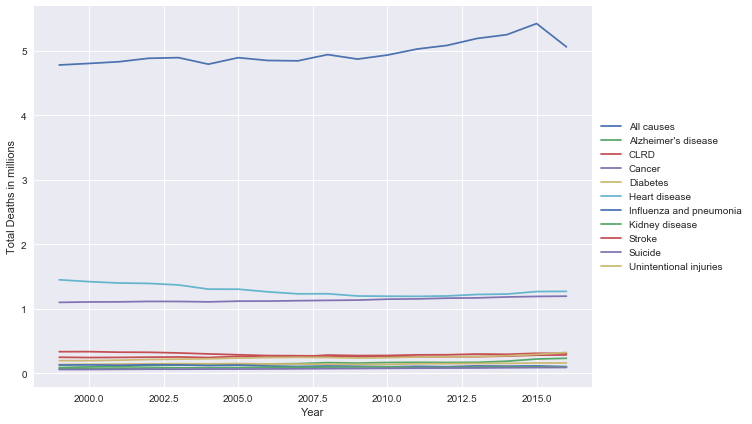

In [208]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
deaths_by_cause.plot(figsize=(10,7)).legend(loc='center left', bbox_to_anchor=(1, 0.5),
                                            fancybox=True, shadow=True);
plt.ylabel('Total Deaths in millions');
# We can clearly see that Heart Diseases and Cancer are the leading 
# causes of death each year since 2009. 

# Here I am using filter for just cancer and heart disease to see the graph we can see it is gradually decreasing and again coming up

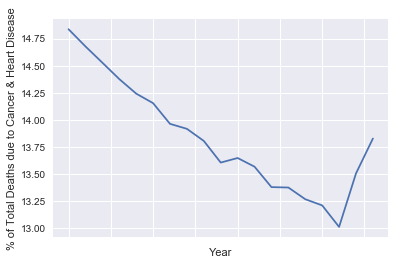

In [212]:
deaths_by_cause['Cancer'] / deaths_by_cause
deaths_by_cause = dfh.pivot_table('Deaths',index='Year', columns='Cause Name',
                                          aggfunc='sum', margins= True) / 1e6
major_causes = 100 * deaths_by_cause[['Cancer','Heart disease']
                                    ].sum(axis=1) /deaths_by_cause[:].sum(axis=1)
major_causes.plot()
plt.ylabel('% of Total Deaths due to Cancer & Heart Disease');
# This shows the sum of leading causes of death decreasing steadily till 2013
# and then rising sharply the next year
# from the previous plot. The recent increases are mostly due to rising Heart Disease